## Introduction to Pandas

Python for Data Analysis, 2nd Edition
Data Wrangling with Pandas, NumPy, and IPython
By William McKinney
Publisher: O'Reilly Media
Release Date: October 2017
Pages: 522
http://proquest.safaribooksonline.com/book/programming/python/9781491957653/

https://pandas.pydata.org/pandas-docs/stable/dsintro.html


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt

### Split-Apply-Combine (GroupBy)

In the first stage of the process, data contained in a pandas object, whether a Series, DataFrame, or otherwise, is split into groups based on one or more keys that you provide. The splitting is performed on a particular axis of an object. For example, a DataFrame can be grouped on its rows (axis=0) or its columns (axis=1). Once this is done, a function is applied to each group, producing a new value. Finally, the results of all those function applications are combined into a result object. 

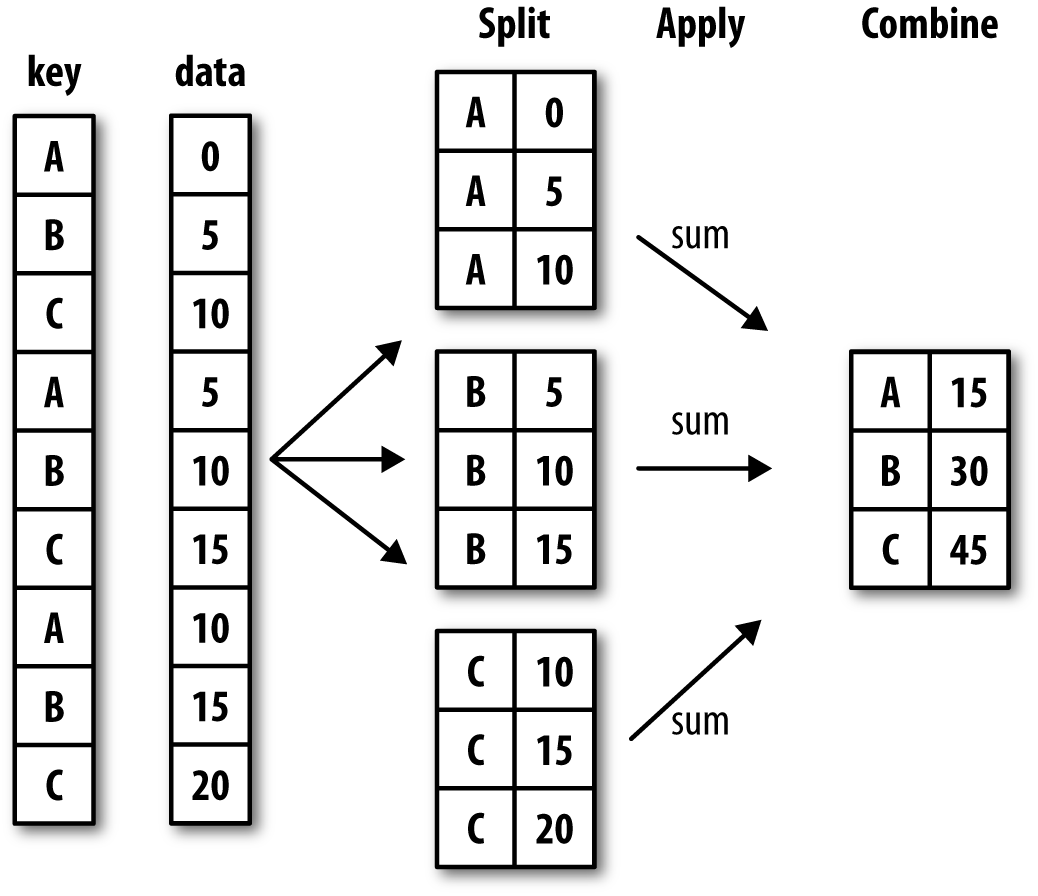


In [2]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : [11.0, 12.0, 13.0, 14.0, 15.0],
                   'data2' : [1.0, 1.2, 1.0, 1.5, 1.4]})
df

,data1,data2,key1,key2
0,11.0,1.0,a,one
1,12.0,1.2,a,two
2,13.0,1.0,b,one
3,14.0,1.5,b,two
4,15.0,1.4,a,one


In [3]:
grouped = df.groupby(['key1'])
list(grouped)[0]

('a',    data1  data2 key1 key2
 0   11.0    1.0    a  one
 1   12.0    1.2    a  two
 4   15.0    1.4    a  one)

In [4]:
grouped.mean()

,data1,data2
key1,,
a,12.666667,1.20
b,13.500000,1.25


In [5]:
grouped = df.groupby(['key1','key2'])
list(grouped)[0]

(('a', 'one'),    data1  data2 key1 key2
 0   11.0    1.0    a  one
 4   15.0    1.4    a  one)

In [6]:
grouped.mean()

data1  data2
key1 key2              
a    one    13.0    1.2
     two    12.0    1.2
b    one    13.0    1.0
     two    14.0    1.5

In [8]:
lst = [1, 2, 3, 1, 2, 3]
s = pd.Series([1, 2, 3, 10, 20, 30], lst)
print (s)
grouped = s.groupby(level=0)
print (grouped.sum())
print (grouped.first())
print (grouped.last())


1     1
2     2
3     3
1    10
2    20
3    30
dtype: int64
1    11
2    22
3    33
dtype: int64
1    1
2    2
3    3
dtype: int64
1    10
2    20
3    30
dtype: int64


### Pandas Groupby Tutorial
Ref: https://www.datacamp.com/community/tutorials/pandas-split-apply-combine-groupby
Tutorial used here is copyrighted <br>
Copyright (c) 2017 DataCamp <br>
Licensed under <a href="mit-license.txt">MIT License</a>

### Working with Time Series
Resampling
Windows - rolling expansion


### Resampling and Frequency Conversion
Resampling refers to the process of converting a time series from one frequency to another. Aggregating higher frequency data to lower frequency is called downsampling, while converting lower frequency to higher frequency is called upsampling. 

In [10]:
start = datetime(2016, 10, 17)
end = datetime(2017, 10, 27)
all_data = {ticker: web.DataReader(ticker,'yahoo',start, end)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
price.head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2016-10-17,114.631294,779.960022,146.212082,55.334755
2016-10-18,114.553284,795.260010,142.386032,55.760254
2016-10-19,114.211967,801.500000,142.896194,55.634537
2016-10-20,114.153458,796.969971,143.141785,55.363766
2016-10-21,113.704872,799.369995,141.356308,57.694359


In [11]:
price[:30]

,AAPL,GOOG,IBM,MSFT
Date,,,,
2016-10-17,114.631294,779.960022,146.212082,55.334755
2016-10-18,114.553284,795.260010,142.386032,55.760254
2016-10-19,114.211967,801.500000,142.896194,55.634537
2016-10-20,114.153458,796.969971,143.141785,55.363766
2016-10-21,113.704872,799.369995,141.356308,57.694359
2016-10-24,114.728798,813.109985,142.244339,58.990215
2016-10-25,115.313919,807.669983,142.537186,58.980541
2016-10-26,112.719955,799.070007,143.415771,58.632401
2016-10-27,111.637520,795.349976,144.870636,58.119862


In [12]:
monthly_price = price.resample('M').first()
print (monthly_price)

                  AAPL        GOOG         IBM       MSFT
Date                                                     
2016-10-31  114.631294  779.960022  146.212082  55.334755
2016-11-30  108.721756  783.609985  144.341568  57.829750
2016-12-31  107.319603  747.919983  152.352585  57.636265
2017-01-31  113.847588  786.140015  159.378235  60.926991
2017-02-28  126.197815  795.695007  166.146484  61.900574
2017-03-31  137.613022  835.239990  174.820023  63.607956
2017-04-30  141.462158  838.549988  167.661957  64.205437
2017-05-31  144.297287  912.570007  152.615616  67.986259
2017-06-30  151.416931  966.950012  148.120361  69.055672
2017-07-31  141.848343  898.700012  150.943649  67.154427
2017-08-31  148.322952  930.830017  140.970001  71.498734
2017-09-30  162.798615  937.340027  141.263290  73.226547
2017-10-31  152.636734  953.270020  143.792847  73.890076


In [13]:
monthly_price = price.resample('M').last()
print (monthly_price)

                  AAPL         GOOG         IBM       MSFT
Date                                                      
2016-10-31  110.720856   784.539978  145.191833  57.945789
2016-11-30  108.329185   758.039978  154.640457  58.668266
2016-12-31  113.524132   771.820007  158.234299  60.498604
2017-01-31  118.944504   796.789978  166.365753  62.942310
2017-02-28  134.856659   823.210022  172.773514  62.667637
2017-03-31  141.422775   829.559998  167.316086  64.509079
2017-04-30  141.412903   905.960022  154.008820  67.055740
2017-05-31  151.001770   964.859985  148.081573  68.799545
2017-06-30  142.362366   908.729980  149.245819  67.903107
2017-07-31  147.018143   930.500000  140.358765  71.616936
2017-08-31  162.749008   939.330017  140.233810  74.048531
2017-09-30  152.944366   959.109985  142.243729  73.771233
2017-10-31  161.806259  1019.270020  150.675598  83.001305


In [14]:
def custom_function(temp):
    """ first value of the period """
    return temp[0]
print (price.resample('M').apply(custom_function))


                  AAPL        GOOG         IBM       MSFT
Date                                                     
2016-10-31  114.631294  779.960022  146.212082  55.334755
2016-11-30  108.721756  783.609985  144.341568  57.829750
2016-12-31  107.319603  747.919983  152.352585  57.636265
2017-01-31  113.847588  786.140015  159.378235  60.926991
2017-02-28  126.197815  795.695007  166.146484  61.900574
2017-03-31  137.613022  835.239990  174.820023  63.607956
2017-04-30  141.462158  838.549988  167.661957  64.205437
2017-05-31  144.297287  912.570007  152.615616  67.986259
2017-06-30  151.416931  966.950012  148.120361  69.055672
2017-07-31  141.848343  898.700012  150.943649  67.154427
2017-08-31  148.322952  930.830017  140.970001  71.498734
2017-09-30  162.798615  937.340027  141.263290  73.226547
2017-10-31  152.636734  953.270020  143.792847  73.890076


In [15]:
returns = monthly_price.pct_change()
returns

,AAPL,GOOG,IBM,MSFT
Date,,,,
2016-10-31,NaN,NaN,NaN,NaN
2016-11-30,-0.021601,-0.033778,0.065077,0.012468
2016-12-31,0.047955,0.018178,0.023240,0.031198
2017-01-31,0.047746,0.032352,0.051389,0.040393
2017-02-28,0.133778,0.033158,0.038516,-0.004364
2017-03-31,0.048690,0.007714,-0.031587,0.029384
2017-04-30,-0.000070,0.092097,-0.079534,0.039478
2017-05-31,0.067808,0.065014,-0.038486,0.026005
2017-06-30,-0.057214,-0.058174,0.007862,-0.013030


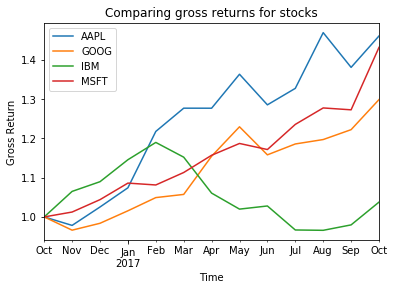

In [16]:
rgross = returns + 1.0
_ = rgross.fillna(1.0, inplace=True)  # assume the return on the first day was zero
prs = rgross.cumprod()
prs.plot()
plt.title('Comparing gross returns for stocks')
plt.xlabel('Time')
plt.ylabel('Gross Return')
plt.legend();
plt.show()

Exercise 7. Downsample weekly and plot gross returns for AAPL.

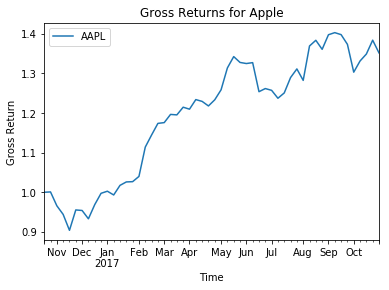

In [22]:
all_data = {ticker: web.DataReader(ticker,'yahoo',start, end)
            for ticker in ['AAPL']}
price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})

weekly_price = price.resample('W').first()
returns = weekly_price.pct_change()
rgross = returns + 1.0
_ = rgross.fillna(1.0, inplace=True)  # assume the return on the first day was zero
prs = rgross.cumprod()
prs.plot()
plt.title('Gross Returns for Apple')
plt.xlabel('Time')
plt.ylabel('Gross Return')
plt.legend();
plt.show()


### Moving Window Functions
For working with data, a number of windows functions are provided for computing common window or rolling statistics. Among these are count, sum, mean, median, correlation, variance, covariance, standard deviation, skewness, and kurtosis.

In [23]:
s = pd.Series(np.arange(100), index=pd.date_range('1/1/2000', periods=100))
r = s.rolling(window=10)
s.head()

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
Freq: D, dtype: int32

In [24]:
print(r)

Rolling [window=10,center=False,axis=0]


In [25]:
print (r.mean())

2000-01-01     NaN
2000-01-02     NaN
2000-01-03     NaN
2000-01-04     NaN
2000-01-05     NaN
2000-01-06     NaN
2000-01-07     NaN
2000-01-08     NaN
2000-01-09     NaN
2000-01-10     4.5
2000-01-11     5.5
2000-01-12     6.5
2000-01-13     7.5
2000-01-14     8.5
2000-01-15     9.5
2000-01-16    10.5
2000-01-17    11.5
2000-01-18    12.5
2000-01-19    13.5
2000-01-20    14.5
2000-01-21    15.5
2000-01-22    16.5
2000-01-23    17.5
2000-01-24    18.5
2000-01-25    19.5
2000-01-26    20.5
2000-01-27    21.5
2000-01-28    22.5
2000-01-29    23.5
2000-01-30    24.5
              ... 
2000-03-11    65.5
2000-03-12    66.5
2000-03-13    67.5
2000-03-14    68.5
2000-03-15    69.5
2000-03-16    70.5
2000-03-17    71.5
2000-03-18    72.5
2000-03-19    73.5
2000-03-20    74.5
2000-03-21    75.5
2000-03-22    76.5
2000-03-23    77.5
2000-03-24    78.5
2000-03-25    79.5
2000-03-26    80.5
2000-03-27    81.5
2000-03-28    82.5
2000-03-29    83.5
2000-03-30    84.5
2000-03-31    85.5
2000-04-01  

In [27]:
# first non-zero entry
arr1 = s[0:10]
print (np.mean(arr1))

4.5


In [28]:
# second non-zero entry
arr2= s[1:11]
print (arr2)
print (np.mean(arr2))

2000-01-02     1
2000-01-03     2
2000-01-04     3
2000-01-05     4
2000-01-06     5
2000-01-07     6
2000-01-08     7
2000-01-09     8
2000-01-10     9
2000-01-11    10
Freq: D, dtype: int32
5.5


In [30]:
close_px_all = pd.read_csv('stock_px_2.csv',
                           parse_dates=True, index_col=0)
print(close_px_all.head())

            AAPL   MSFT    XOM     SPX
2003-01-02  7.40  21.11  29.22  909.03
2003-01-03  7.45  21.14  29.24  908.59
2003-01-06  7.45  21.52  29.96  929.01
2003-01-07  7.43  21.93  28.95  922.93
2003-01-08  7.28  21.31  28.83  909.93


In [31]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
#print (close_px)

In [32]:
# sample business day, if missing values fill forward (fill with the last know value)
close_px = close_px.resample('B').ffill()
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


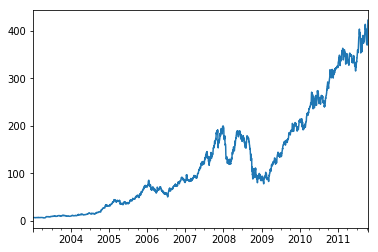

In [33]:
close_px.AAPL.plot()
plt.show()

#### Rolling window

In [ ]:
df = pd.DataFrame({'B': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]})

In [34]:
close_px?

In [ ]:
df.rolling(5).mean()
#df.rolling(5, min_periods=2).mean()

In [ ]:
close_px.AAPL.rolling(250).mean().plot()
#close_px.AAPL.rolling(250, min_periods=25).mean().plot()
plt.show()

In [ ]:
appl_std250 = close_px.AAPL.rolling(250).std()
appl_std250.plot()
plt.show()

Exercise 8: Plot the rolling mean of three stocks in one plot for  close_px. First plot them using a rolling window of size 250 and then for size 25 and observe the difference. Repeat this exercise for standard deviation.

Rolling Mean of size 25


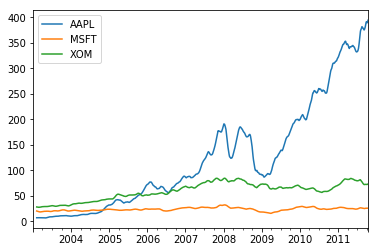

Rolling Mean of size 250


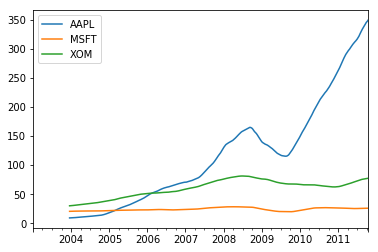

Standard Deviation of size 250


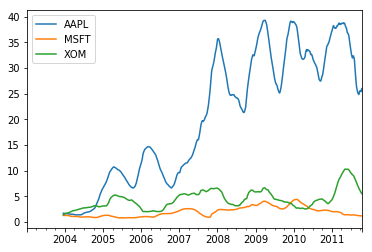

Standard Deviation of size 25


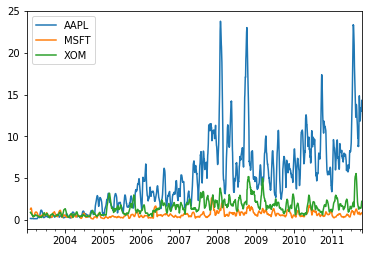

In [42]:
close_px.rolling(25).mean().plot()
print ('Rolling Mean of size 25')
plt.show()

close_px.rolling(250).mean().plot()
print ('Rolling Mean of size 250')
plt.show()

appl_std250 = close_px.rolling(250).std()
appl_std250.plot()
print ('Standard Deviation of size 250')
plt.show()

appl_std25 = close_px.rolling(25).std()
appl_std25.plot()
print ('Standard Deviation of size 25')
plt.show()


### Binary Moving Window Functions
Some statistical operators, like correlation and covariance, need to operate on two time series. As an example, financial analysts are often interested in a stock’s correlation to a benchmark index like the S&P 500. 

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
Name: SPX, dtype: float64
                AAPL      MSFT       XOM
2003-01-02       NaN       NaN       NaN
2003-01-03  0.006757  0.001421  0.000684
2003-01-06  0.000000  0.017975  0.024624
2003-01-07 -0.002685  0.019052 -0.033712
2003-01-08 -0.020188 -0.028272 -0.004145


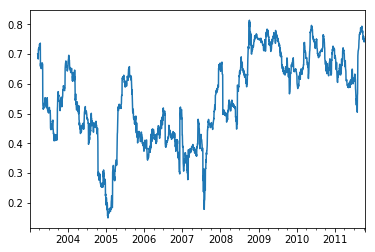

In [46]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
print(spx_rets.head())
returns = close_px.pct_change()
print(returns.head())
corr = returns.AAPL.rolling(100, min_periods=50).corr(spx_rets)
corr.plot()
plt.show()

### Correlation with multiple stocks
Suppose you wanted to compute the correlation of the S&P 500 index with many stocks at once. Writing a loop and creating a new DataFrame would be easy but might get repetitive, so if you pass a Series and a DataFrame, a function like rolling_corr will compute the correlation of the Series (spx_rets, in this case) with each column in the DataFrame

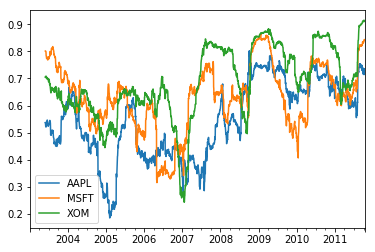

In [45]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()
plt.show()

### Expanding Windows
A common alternative to rolling statistics is to use an expanding window, which yields the value of the statistic with all the data available up to that point in time.

These follow a similar interface to .rolling, with the .expanding method returning an Expanding object.


In [47]:
df = pd.DataFrame({'B': [0, 1, 2, 3, 4, 5, np.nan, 7, 8, 9]})

In [ ]:
df.expanding?

In [48]:
df.expanding(3).sum()

,B
0,NaN
1,NaN
2,3.0
3,6.0
4,10.0
5,15.0
6,15.0
7,22.0
8,30.0
9,39.0


In [49]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [50]:
# create test data
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
s = s.cumsum()

In [51]:
print (s[:10])

2000-01-01   -0.672506
2000-01-02   -2.562444
2000-01-03   -1.900974
2000-01-04   -2.037837
2000-01-05   -2.171145
2000-01-06   -2.683545
2000-01-07   -3.325038
2000-01-08   -3.211216
2000-01-09   -4.914262
2000-01-10   -4.863817
Freq: D, dtype: float64


In [52]:
s.expanding(min_periods=1).mean().head()

2000-01-01   -0.672506
2000-01-02   -1.617475
2000-01-03   -1.711975
2000-01-04   -1.793440
2000-01-05   -1.868981
Freq: D, dtype: float64

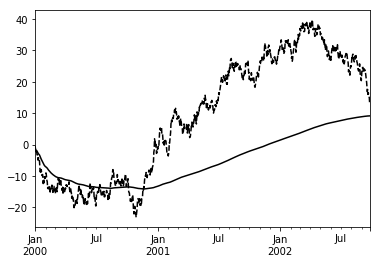

In [53]:
s.plot(style='k--')
s.expanding().mean().plot(style='k')
plt.show()

### Exponentially Weighted Windows
Reference: https://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows

A related set of functions are exponentially weighted versions of several of the above statistics. A similar interface to .rolling and .expanding is accessed through the .ewm method to receive an EWM object. 

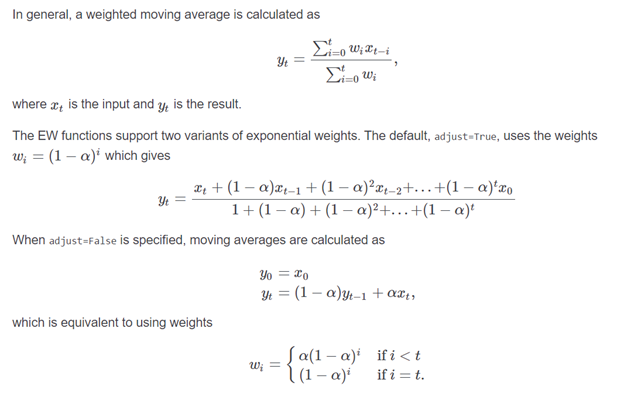

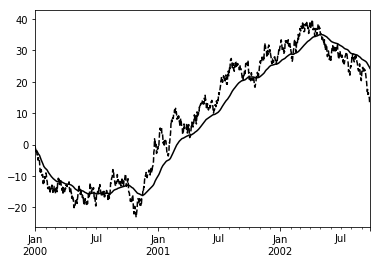

In [54]:
s.plot(style='k--')
s.ewm(span=100).mean().plot(style='k') #20-day Exponentially Weightred moving average
plt.show()

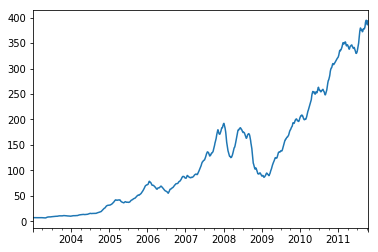

In [55]:
close_px.AAPL.ewm(span=20).mean().plot()
#close_px.ewm(span=20).mean().plot()
plt.show()

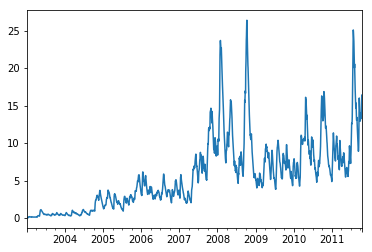

In [56]:
close_px.AAPL.ewm(span=20).std().plot()
#close_px.ewm(span=20).mean().plot()
plt.show()

For computing annual historic volatility(std) of a stock, use the following computaiton:

$\mbox{Volatility per Annum}  =  \mbox{Volatility per Trading Day}   \times \sqrt{\mbox{Number of Trading Days per Annum}} $

A typical way of computing daily volatility is to take daily logarithmic returns of the closing data for a stock for $252$ days (number of trading days per annum).






In [57]:
## Computing Volatility


# Pull sp500 data from Yahoo finance 
sp500 = web.DataReader('^GSPC',data_source='yahoo',start='1/1/2010', end='1/1/2016')

In [58]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [59]:
print(sp500['Close'].head())
sp500['Close'].shift(1).head()

Date
2010-01-04    1132.989990
2010-01-05    1136.520020
2010-01-06    1137.140015
2010-01-07    1141.689941
2010-01-08    1144.979980
Name: Close, dtype: float64


Date
2010-01-04            NaN
2010-01-05    1132.989990
2010-01-06    1136.520020
2010-01-07    1137.140015
2010-01-08    1141.689941
Name: Close, dtype: float64

In [60]:
# Compute the logarithmic returns using the Closing price 
sp500['Log_Ret'] = np.log(sp500['Close'] / sp500['Close'].shift(1))
sp500.head()

,Open,High,Low,Close,Adj Close,Volume,Log_Ret
Date,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003111
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000545
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.003993
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002878


In [61]:
sp500std = sp500['Log_Ret'].rolling(252).std() * np.sqrt(252)
sp500std.tail(5)

Date
2015-12-24    0.154718
2015-12-28    0.154696
2015-12-29    0.155058
2015-12-30    0.155150
2015-12-31    0.155092
Name: Log_Ret, dtype: float64

In [62]:
sp500['Volatility'] =  sp500['Log_Ret'].rolling(252).std() * np.sqrt(252)
sp500.tail(5)

,Open,High,Low,Close,Adj Close,Volume,Log_Ret,Volatility
Date,,,,,,,,
2015-12-24,2063.520020,2067.360107,2058.729980,2060.989990,2060.989990,1411860000,-0.001600,0.154718
2015-12-28,2057.770020,2057.770020,2044.199951,2056.500000,2056.500000,2492510000,-0.002181,0.154696
2015-12-29,2060.540039,2081.560059,2060.540039,2078.360107,2078.360107,2542000000,0.010574,0.155058
2015-12-30,2077.340088,2077.340088,2061.969971,2063.360107,2063.360107,2367430000,-0.007243,0.155150
2015-12-31,2060.590088,2062.540039,2043.619995,2043.939941,2043.939941,2655330000,-0.009456,0.155092


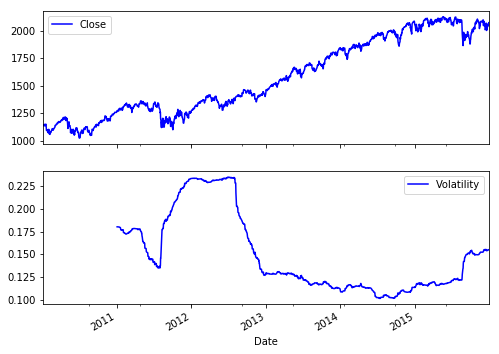

In [63]:
# Plot the sp500 Price series and the Volatility
sp500[['Close', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))
plt.show()

Exercise 9:  Repeat the above plots by replacing logarithmic returns by regular returns. Do you notice any difference?

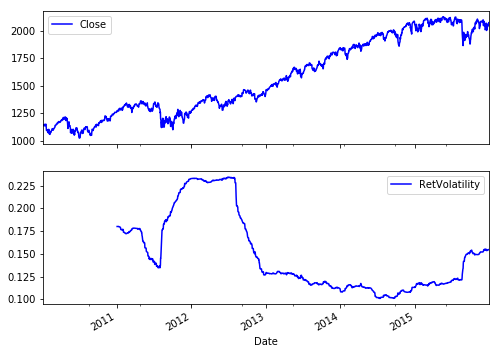

In [67]:
# Compute the logarithmic returns using the Closing price 
sp500['Ret'] = sp500['Close'].pct_change()
sp500.head()
sp500['RetVolatility'] =  sp500['Ret'].rolling(252).std() * np.sqrt(252)
sp500.tail(5)
sp500[['Close', 'RetVolatility']].plot(subplots=True, color='blue',figsize=(8, 6))
plt.show()